In [1]:
#this block is for reading in all the json files and combining them into one big dataframe for later use
import pandas as pd
import numpy as np
import requests
import nltk
import json
import random
from nltk import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import state_union 
from nltk.collocations import *
import urllib.request
import pickle
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer   
#punc_word=set(punctuation)
#stop_word=set(stopwords.words("English"))
#initiallist=""
#cleanlist = []
def read_and_process(file_name):
    df=pd.read_json(file_name, lines=True)
    columns=['coordinates', 'created_at',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id_str','in_reply_to_user_id_str',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries']
    ex_df=df[columns]
    ex_df=ex_df[ex_df['lang']=='en']
    return ex_df



In [ ]:
df_1=read_and_process("ae832c68a41b48b890a426e159076a9b_001.json")
df_2=read_and_process("ae832c68a41b48b890a426e159076a9b_002.json")
df_3=read_and_process("ae832c68a41b48b890a426e159076a9b_003.json")
df_4=read_and_process("ae832c68a41b48b890a426e159076a9b_004.json")
df_5=read_and_process("ae832c68a41b48b890a426e159076a9b_005.json")
df=df_1.append(df_2,ignore_index=True)
df=df.append(df_3,ignore_index=True)
df=df.append(df_4,ignore_index=True)
df=df.append(df_5,ignore_index=True)
print(df)

In [ ]:
#initial exploring characteristics of the chemtrail tweets
"""random.seed(4)
np.random.permutation(df)
ex_df=df.iloc[:100,1:]
print(ex_df)"""
"""columns=['coordinates', 'created_at',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id_str','in_reply_to_user_id_str',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries']
ex_df=df[columns]
ex_df=ex_df[ex_df['lang']=='en']"""
#ex_df.to_excel("chemtrail_json_5.xlsx")
grouped=ex_df.groupby('in_reply_to_screen_name')
size=grouped.size().sort_values(ascending=False)
#grouped['count_sum'] = ex_df.groupby('id_str').count()
#grouped.sort_index(ascending=False)
print(grouped)
print(size)
highly_replied_dict=size[size>20].to_dict()
print(highly_replied_dict)
print()
highly_replied_list=list(highly_replied_dict.keys())
print(highly_replied_list)
df_for_scrutiny=ex_df[ex_df['in_reply_to_screen_name'].isin(highly_replied_list)]
print(df_for_scrutiny['full_text'])

In [26]:
print(len(df.columns))
print(df.columns)
print(df['full_text'])

32
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
0         RT @Lena38Baker: #GeoEngineering #WMDs #WWIII ...
1         @DerZentralrat3 @Beatrix_vStorch Hast die chem...
2         USAF Whistleblower talks Chemtrails / Geoengin...
3         RT @miketrep82: #HamOn #Nwo #Haarp #OpChemTrai...
4         RT @tbigggs: 5/1/18 South Jersey #OpChemtrails...
5         RT @tbigggs: 5/3/18 South Jersey #OpChemtrails...
6         #GeoEn

In [8]:
for i in range(32):
    print(df.iloc[:,i].isna().unique())
#contributors-all nan- no use, discard
#'display_text_range': no idea what is it, discard
#geo- some are nan some are not, Deprecated, use coordinates instead. Discard
#id-drop id, use id_str instead
#in_reply_to_status_id - drop, use in_reply_to_status_id_str instead
#'in_reply_to_user_id', drop, use in_reply_to_user_id_str instead
#is_quote_status, discard, since when quoted_status_id_str surfaces, it already means that the tweet is a quote tweet
#'quoted_status_id', discard, use quoted_status_id_str' instead

#coordinates- some tweets have coordinates, maybe can map the tweets by coordinates and see the relations, keep coordinates, The inner coordinates array is formatted as geoJSON (longitude first, then latitude)
#created_at - all not nan, maybe can map by created time to see what's happening behind it
#entities- all not nan, but no idea what it is. Still, keep it
#entended_entities- some are nan and some are not. but no idea what it is. Still, keep it, When between one and four native photos or one video or one animated GIF are in Tweet, contains an array 'media' metadata.
#favorite_count-not nan, keep it
#favorited- not nan, keep it, Indicates whether this Tweet has been liked by the authenticating user
#full_text - keep it
#id_str- keep it
#in_reply_to_screen_name - keep, maybe apply text analytics or NLP on it to figure out what's in common
#in_reply_to_status_id_str', keep
#'in_reply_to_user_id_str', keep
#'lang', keep
#'metadata', keep
#'possibly_sensitive', keep, This field only surfaces when a Tweet contains a link. The meaning of the field doesn’t pertain to the Tweet content itself, but instead it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content. 
#quoted_status, keep, this attribute contains the Tweet object of the original Tweet that was quoted.
#'quoted_status_id_str', keep, only surfaces when the Tweet is a quote Tweet. This is the string representation Tweet ID of the quoted Tweet.
#'retweet_count', keep, which could be used to determine the popularity of a certain tweet
#'retweeted',Indicates whether this Tweet has been Retweeted by the authenticating user
#'retweeted_status', This attribute contains a representation of the original Tweet that was retweeted. Keep
#'source', keep, Utility used to post the Tweet, as an HTML-formatted string. could be used to analyze behavoiral pattern
#'truncated', Keep, Indicates whether the value of the text parameter was truncated
#'user', dictionary of the user attributes, keep
#'withheld_in_countries', keep, a list of uppercase two-letter country codes this content is withheld from.


[ True]
[ True False]
[False]
[False]
[False]
[ True False]
[False]
[False]
[False]
[ True False]
[False]
[False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[False]
[False]
[False]
[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
[False]
[False]
[False  True]
[False]
[False]
[False]
[ True False]


In [2]:
ex_df=read_and_process("ae832c68a41b48b890a426e159076a9b_005.json")
print(ex_df)

       coordinates          created_at  \
2             None 2018-05-04 13:43:02   
4             None 2018-05-04 13:42:28   
5             None 2018-05-04 13:42:27   
7             None 2018-05-04 13:42:14   
10            None 2018-05-04 13:41:01   
11            None 2018-05-04 13:41:01   
12            None 2018-05-04 13:40:16   
13            None 2018-05-04 13:40:09   
14            None 2018-05-04 13:40:06   
15            None 2018-05-04 13:39:53   
16            None 2018-05-04 13:38:57   
17            None 2018-05-04 13:37:44   
18            None 2018-05-04 13:37:15   
19            None 2018-05-04 13:37:13   
20            None 2018-05-04 13:36:58   
21            None 2018-05-04 13:36:30   
22            None 2018-05-04 13:35:56   
24            None 2018-05-04 13:35:14   
25            None 2018-05-04 13:35:13   
26            None 2018-05-04 13:35:12   
27            None 2018-05-04 13:35:10   
28            None 2018-05-04 13:35:09   
29            None 2018-05-04 13:3

In [5]:
ex_df_1=ex_df.iloc[:10000,:]
print(ex_df.retweeted_status.iloc[1]['full_text'])
print(ex_df.retweeted_status.iloc[1].get('full_text'))

5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it's MIND NUMBING!)😒 https://t.co/GEXyV5pc5S
5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it's MIND NUMBING!)😒 https://t.co/GEXyV5pc5S


In [6]:
#print(ex_df['full_text'])
#print(ex_df.full_text.iloc[0])
full_text_list=[]
for i in range (len(ex_df_1)):
    text=ex_df_1.full_text.iloc[i]
    #print(text)
    if (text.startswith("RT") & isinstance(ex_df_1.retweeted_status.iloc[i],dict)):#for tweets that are RTing, using the full text of the original tweet as the full text
        full_text_list.append(ex_df_1.retweeted_status.iloc[i]['full_text'])
        
    else:#for tweets that are replying or original tweeting, use tweet hydrator/tweepy api (a = api.get_status(id_str, tweet_mode='extended')) to get the full text as the full text
        #tweet_id=ex_df.id_str.iloc[i]
        #for now we are only experimenting with the full text extracting directly from the 'full_text' field of the tweet
        full_text_list.append(text)
print(full_text_list)
    

['USAF Whistleblower talks Chemtrails / Geoengineering\nhttps://t.co/UkYlzZ9RhP', '5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it\'s MIND NUMBING!)😒 https://t.co/GEXyV5pc5S', '5/3/18 South Jersey #OpChemtrails @OpChemtrails #chemtrails #Geoengineering ...and it continues on &amp; on &amp; on as NO ONE LOOKS UP OR even takes a flyer.... Amazing 😒 #BrainwashedInfants 🔗👶🍼 https://t.co/2PKjkQ135g', '#WAKEUPAMERICA #THINK WHY SINT #TRUMP STOPPING #CHEMTRAILS GETTING WORSE ! THICKER LOWER ! IS TRUMP A BUSH MAN ??? #HITLER', 'The latest Fake Cloud Watch! https://t.co/ia93VOKWKI Thanks to @parzival1 @Skylookup1775 @davebrooker322 #chemtrails #geoengineering', 'HORMONES STRESS CHEMTRAILS NO SUNSHINE ? MAKE HUMANS MEANS SOB"S ! #WAKEUPAMERICA ! WE HAVE THE SAME #POTUS AS ALL THE REST ! #CHEMTRAILS CONTINU

In [37]:
pip install tweet-preprocessor
pip install pyLDAvis

SyntaxError: invalid syntax (<ipython-input-37-bbe220fce2cb>, line 2)

In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
# Remove punctuation
import preprocessor as p
"""import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel"""

p.set_options(p.OPT.URL, p.OPT.EMOJI)
full_text_list_processed=[]
for x in range(len(full_text_list)):
    full_text=full_text_list[x]
    full_text_processed=p.clean(full_text)
    full_text_processed=re.sub('[,\.!?]', '', full_text_processed)
    full_text_processed = re.sub(r'[^a-zA-Z0-9\s]', ' ', full_text_processed) 
    clean = re.compile('<.*?>')
    full_text_processed=re.sub(clean, '', full_text_processed)
    full_text_processed=full_text_processed.lower()
    full_text_processed = re.sub("#", "", full_text_processed)
    full_text_list_processed.append(full_text_processed)
# Convert the titles to lowercase
#full_text_list_processed = full_text_list_processed.apply(lambda x: x.lower())# Print out the first rows of papers
print(full_text_list_processed)

['usaf whistleblower talks chemtrails   geoengineering', '5 1 18 south jersey  opchemtrails  opchemtrails  geoengineering  chemtrails  chemicalattack as  the unconscious  walk around ignoring the fate of humanity a few of us are trying to save it  but they love their ignorance slavery so much it s mind numbing ', '5 3 18 south jersey  opchemtrails  opchemtrails  chemtrails  geoengineering and it continues on  amp  on  amp  on as no one looks up or even takes a flyer amazing  brainwashedinfants', ' wakeupamerica  think why sint  trump stopping  chemtrails getting worse  thicker lower  is trump a bush man   hitler', 'the latest fake cloud watch thanks to  parzival1  skylookup1775  davebrooker322  chemtrails  geoengineering', 'hormones stress chemtrails no sunshine  make humans means sob s   wakeupamerica  we have the same  potus as all the rest   chemtrails continue daily getting worse ', ' lockereschraube chemtrails   d', 'chemtrails for kids your children are being indoctrinated to bel

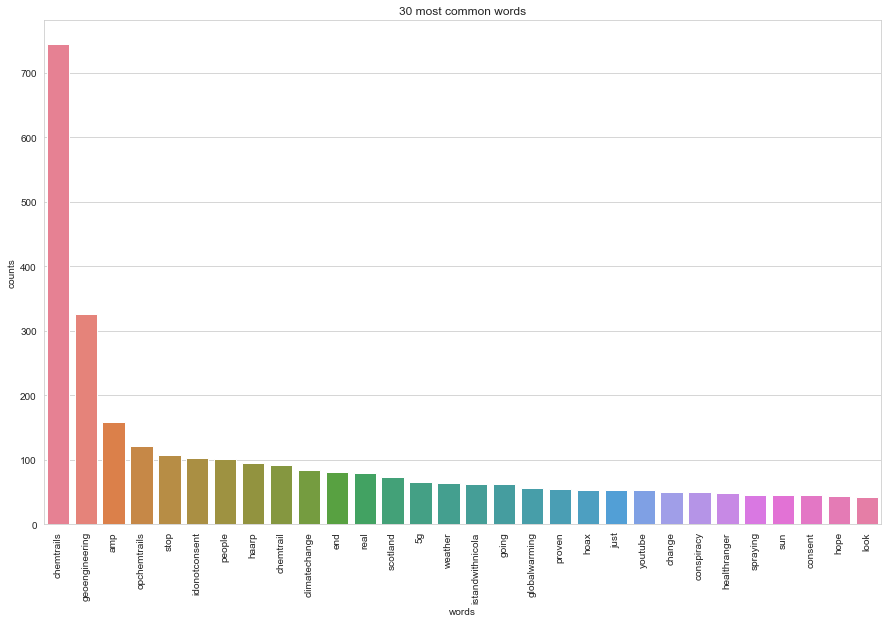

In [8]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_30_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
    
    
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(1,1),stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer)

In [9]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 20# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
chemtrails people geoengineering climatechange stop real going globalwarming proven hoax conspiracy short believing seeing version qanon amp health maga spraying

Topic #1:
haarp geoengineering 5g chemtrails nexrad just longer amp agenda21 wifi gonna emf defense silentwarfare rf agenda2030 alzheimer deaths cancer aerosolassault

Topic #2:
chemtrails look fuck stop opchemtrails amp things spraying naomirwolf society reality sunshine happened ya sun chooses selfie narcissistic denial son

Topic #3:
chemtrails geoengineering gt really wakeup like sky far evil maybe control opchemtrails come sorry doing good wedonotconsent gaps girted need

Topic #4:
chemtrails amp truth cloudseeding lookup breakingnews global realnews weather need busters destroys right wethepeople whidbeyisland masses qanon world weathermodification bee

Topic #5:
chemtrails time care like war know did planet polluted clouds ve pretty beautiful trees consciousness destruction don geoengin

In [10]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize 
from collections import Iterable
#print(full_text_list_processed)
def generate_ngrams(lst, n):
    # Convert to lowercases
    token_list=[]
    for i in range(len(lst)):
        s=lst[i]
        # Replace all none alphanumeric characters with spaces
        #s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s) 
        # Break sentence in the token, remove empty tokens
        temp_list=word_tokenize(s)
        for i in temp_list:        
            token_list.append(i)
    print(token_list)
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    output = list(ngrams(token_list, 5))
    #print(output)
    return output
generate_ngrams(full_text_list_processed,2)

['usaf', 'whistleblower', 'talks', 'chemtrails', 'geoengineering', '5', '1', '18', 'south', 'jersey', 'opchemtrails', 'opchemtrails', 'geoengineering', 'chemtrails', 'chemicalattack', 'as', 'the', 'unconscious', 'walk', 'around', 'ignoring', 'the', 'fate', 'of', 'humanity', 'a', 'few', 'of', 'us', 'are', 'trying', 'to', 'save', 'it', 'but', 'they', 'love', 'their', 'ignorance', 'slavery', 'so', 'much', 'it', 's', 'mind', 'numbing', '5', '3', '18', 'south', 'jersey', 'opchemtrails', 'opchemtrails', 'chemtrails', 'geoengineering', 'and', 'it', 'continues', 'on', 'amp', 'on', 'amp', 'on', 'as', 'no', 'one', 'looks', 'up', 'or', 'even', 'takes', 'a', 'flyer', 'amazing', 'brainwashedinfants', 'wakeupamerica', 'think', 'why', 'sint', 'trump', 'stopping', 'chemtrails', 'getting', 'worse', 'thicker', 'lower', 'is', 'trump', 'a', 'bush', 'man', 'hitler', 'the', 'latest', 'fake', 'cloud', 'watch', 'thanks', 'to', 'parzival1', 'skylookup1775', 'davebrooker322', 'chemtrails', 'geoengineering', 'ho

[('usaf', 'whistleblower', 'talks', 'chemtrails', 'geoengineering'),
 ('whistleblower', 'talks', 'chemtrails', 'geoengineering', '5'),
 ('talks', 'chemtrails', 'geoengineering', '5', '1'),
 ('chemtrails', 'geoengineering', '5', '1', '18'),
 ('geoengineering', '5', '1', '18', 'south'),
 ('5', '1', '18', 'south', 'jersey'),
 ('1', '18', 'south', 'jersey', 'opchemtrails'),
 ('18', 'south', 'jersey', 'opchemtrails', 'opchemtrails'),
 ('south', 'jersey', 'opchemtrails', 'opchemtrails', 'geoengineering'),
 ('jersey', 'opchemtrails', 'opchemtrails', 'geoengineering', 'chemtrails'),
 ('opchemtrails',
  'opchemtrails',
  'geoengineering',
  'chemtrails',
  'chemicalattack'),
 ('opchemtrails', 'geoengineering', 'chemtrails', 'chemicalattack', 'as'),
 ('geoengineering', 'chemtrails', 'chemicalattack', 'as', 'the'),
 ('chemtrails', 'chemicalattack', 'as', 'the', 'unconscious'),
 ('chemicalattack', 'as', 'the', 'unconscious', 'walk'),
 ('as', 'the', 'unconscious', 'walk', 'around'),
 ('the', 'uncon

In [52]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    """with open(LDAvis_data_filepath, 'w') as f:
         pickle.dump(LDAvis_prepared, f)"""
        
# load the pre-prepared pyLDAvis data from disk
"""with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)"""
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


CPU times: user 8.57 s, sys: 45.8 s, total: 54.4 s
Wall time: 2min 7s


In [11]:
#try getting the number of tweets by people, find the people who are tweeting the most, try getting the number of followers by people, finding the people who are tweeting the most and have a lot of followers
unique_tweeter_list=[]
follower_num_list=[]
friends_num_list=[]
status_num_list=[]
for i in range(len(ex_df_1)):
    tweeter_name=ex_df_1.user.iloc[i].get('name')
    follower_num=ex_df_1.user.iloc[i].get('followers_count')
    friends_num=ex_df_1.user.iloc[i].get('friends_count')
    status_num=ex_df_1.user.iloc[i].get('statuses_count')
    if tweeter_name not in unique_tweeter_list:
        unique_tweeter_list.append(tweeter_name)
        follower_num_list.append(follower_num)
        friends_num_list.append(friends_num)
        status_num_list.append(status_num)
#print(unique_tweeter_list)
#print(follower_num_list)
#print(friends_num_list)
tweeting_frequency_list=[]

for j in unique_tweeter_list:
    num=0
    for i in range(len(ex_df_1)):
        if ex_df_1.user.iloc[i].get('name')==j:
            num+=1
    tweeting_frequency_list.append(num)

#print(tweeting_frequency_list)

tweeting_df=pd.DataFrame(list(zip(unique_tweeter_list, tweeting_frequency_list,follower_num_list,friends_num_list,status_num_list)), 
                 columns =['Name', 'num_tweeting','num_follower','num_friends','total_status_num']) 
tweeting_df=tweeting_df.sort_values(by='num_tweeting', ascending=False)
print(tweeting_df)

#grouped=ex_df_1.groupby(unique_tweeter_list)
#size=grouped.size().sort_values(ascending=False)
#grouped['count_sum'] = ex_df.groupby('id_str').count()
#grouped.sort_index(ascending=False)
#print(size)



                                                  Name  num_tweeting  \
32                                   Dr. Amany Alazraq           108   
1                                      Mohamed Solomon            57   
62                                              🇺🇸🇬🇧🇺🇸            55   
56                                     CHEMTRAIL MICKY            20   
2                                    TheRealAbbyNormal            16   
540                                           MUZIKARA            13   
123                                        ARC4Freedom            12   
25                                      Mister Flowers             7   
43                                              NOTBOT             7   
33                                     💥Becca Rebecca💥             7   
467                                           Ciaara🇺🇸             7   
250                                         Starbright             6   
100                                        Hiddenhand👥          

In [12]:
#try getting the people who are RT-ed the most and their follower count
unique_tweeter_list=[]
follower_num_list=[]
friends_num_list=[]
status_num_list=[]
retweeted_num_list=[]
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('screen_name'))
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('followers_count'))
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('friends_count'))
for i in range(len(ex_df_1)):
    if pd.isnull(ex_df_1.retweeted_status.iloc[i])==False:#this tweet is RTing someone else's tweet, find the original author and follower count, friends count and the status count of the original author, also figure out the RT-count of each tweet (add all the RT-count of each tweet for the same user to get the number of times that author is being RTed)
        tweeter_name=ex_df_1.retweeted_status.iloc[i].get('user').get('screen_name')
        follower_num=ex_df_1.retweeted_status.iloc[i].get('user').get('followers_count')
        friends_num=ex_df_1.retweeted_status.iloc[i].get('user').get('friends_count')
        status_num=ex_df_1.retweeted_status.iloc[i].get('user').get('statuses_count')
        if tweeter_name not in unique_tweeter_list:
            unique_tweeter_list.append(tweeter_name)
            follower_num_list.append(follower_num)
            friends_num_list.append(friends_num)
            status_num_list.append(status_num)
print(unique_tweeter_list)
print(follower_num_list)
print(friends_num_list)
print(status_num_list)


for i in unique_tweeter_list:
    retweeted_count=0
    for j in range(len(ex_df_1)):
        if pd.isnull(ex_df_1.retweeted_status.iloc[j])==False:#this tweet is RTing someone else's tweet, find the original author and follower count, friends count and the status count of the original author, also figure out the RT-count of each tweet (add all the RT-count of each tweet for the same user to get the number of times that author is being RTed)
            tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
        if tweeter_name==i:
            retweeted_count+=1
    retweeted_num_list.append(retweeted_count)
print(retweeted_num_list)


retweeting_df=pd.DataFrame(list(zip(unique_tweeter_list, retweeted_num_list,follower_num_list,friends_num_list,status_num_list)), 
                 columns =['Name', 'num_retweeted','num_follower','num_friends','total_status_num']) 
retweeting_df=retweeting_df.sort_values(by='num_retweeted', ascending=False)
print(retweeting_df)


['tbigggs', 'fakecloudwatch', 'SteerMark', 'Uniocracy', 'IanSeine', 'whowrotewhat', 'libertyIAB', 'chairdogmtn', 'Worldmuslimnews', 'MindFoodandMood', 'whymandesign', 'WisdomsGrave', 'TrillegalAlien', 'IEAffiliate', 'ivanpresley88', 'EnslavedUS', 'crissie111', 'DBYWG', 'GreatAwakening6', 'Simply1Earth', 'TalkNetworkNews', 'SPP_kwalker', 'peterbonda007', 'DavidHarley6', 'exoticmilkppl', 'ExVaXXr', 'jasdude', 'AllesHeilHydra', 'CosmUnity', 'Scimitar_SS', 'ALoveGlow', 'Carmilla5', 'OpChemArchives', 'Tazatator', 'discotracker', 'Rod1015', 'bigherm3953', 'CarrieGaard', 'DJ___Mission', 'James_Enslaved', 'ARC4Freedom', 'TraceyCooke1027', 'Mark9229', 'one5three', 'EvieFransisco', 'bsibley97', 'tikitakahasi', 'RealAbbyNormale', 'HealthRanger', 'ddtayside', 'GrahamP58', 'LadyWilson8', 'DanPeacock12', 'Genevagirl81', 'GillianSproule', 'culture_scrap', 'RealNaturalNews', 'DukeDaddy4', 'Cagsil', 'Gorgiee99', 'kubashacka', 'docsgenes', 'ThisLionsheart', 'NinjaAlex420', 'SimpleGroup_Inc', 'Ambellina7

In [13]:
#find the ones that are mentioned the most frequently-for RTs, go to retweeted_status and find the user_mentions there
user_mentions_list=[]
for i in range(len(ex_df_1)):
    if len(ex_df_1.entities.iloc[i].get('user_mentions'))>0:
        for j in range(len(ex_df_1.entities.iloc[i].get('user_mentions'))):
            user=ex_df_1.entities.iloc[i].get('user_mentions')[j].get('screen_name')
            if user not in user_mentions_list:
                user_mentions_list.append(user)
print(user_mentions_list)

num_user_mentioned_list=[]
for i in user_mentions_list:
    num=0
    for j in range(len(ex_df_1)):
        if len(ex_df_1.entities.iloc[j].get('user_mentions'))>0:
            for l in range(len(ex_df_1.entities.iloc[j].get('user_mentions'))):
                user=ex_df_1.entities.iloc[j].get('user_mentions')[l].get('screen_name')
                if user==i:
                    num+=1
    num_user_mentioned_list.append(num)
print(num_user_mentioned_list)

user_mention_df=pd.DataFrame(list(zip(user_mentions_list, num_user_mentioned_list)), 
                 columns =['User_Mentioned', 'num_mentioned']) 
user_mention_df=user_mention_df.sort_values(by='num_mentioned', ascending=False)
print(user_mention_df)



['tbigggs', 'OpChemtrails', 'fakecloudwatch', 'parzival1', 'Skylookup1775', 'davebrooker322', 'lockereschraube', 'SteerMark', 'Uniocracy', 'PhillipEnglish', 'Micklanna', 'magapleasenow', 'FoxNews', 'IanSeine', 'Alicia_May_Bee', 'whowrotewhat', 'EllaaaCruzzz', 'realDonaldTrump', 'RealAlexJones', 'AP', 'V4CRMediaTeam', 'DHSgov', 'StateDept', 'UN', 'seanhannity', 'SaraCarterDC', 'libertyIAB', 'chairdogmtn', 'Worldmuslimnews', 'MindFoodandMood', 'whymandesign', 'WisdomsGrave', 'TrillegalAlien', 'IEAffiliate', 'Agenda21Observr', 'naomirwolf', 'Quality_Qontrol', 'NelsonFarmer', 'ivanpresley88', 'EnslavedUS', 'crissie111', 'DBYWG', 'GreatAwakening6', 'B754344255', 'Simply1Earth', 'RockyMt2', 'TalkNetworkNews', 'SPP_kwalker', 'peterbonda007', 'BBCWorld', 'DavidHarley6', 'peter_berner', 'exoticmilkppl', 'ExVaXXr', 'jasdude', 'AllesHeilHydra', 'krassenstein', 'CosmUnity', 'Scimitar_SS', 'VORdotcom', 'Dev_Fadnavis', 'ALoveGlow', 'Carmilla5', 'OpChemArchives', 'Tazatator', 'Cagsil', 'USAShopper', 

In [14]:
#try getting the urls which are RT-ed the most and analyze if they are virus-free or not
#media_list=[] #Since media is say the media the user uploaded, each media uploaded(even if the content is the same) is supposed to be assigned its own url. In this case I don't think scraping media url is meaningful
#media_mention_list=[]
url_list=[]
url_mention_list=[]
for i in range(len(ex_df_1)):
    if(len(ex_df_1.entities.iloc[i].get('urls'))>0):
        for j in range(len(ex_df_1.entities.iloc[i].get('urls'))):
            url=ex_df_1.entities.iloc[i].get('urls')[j].get('expanded_url')
            if url not in url_list:
                url_list.append(url)
print(url_list)            
for i in url_list:
    num=0
    for j in range(len(ex_df_1)):
        if(len(ex_df_1.entities.iloc[j].get('urls'))>0):
            for m in range(len(ex_df_1.entities.iloc[j].get('urls'))):
                url=ex_df_1.entities.iloc[j].get('urls')[m].get('expanded_url')
                if url==i:
                    num+=1
    url_mention_list.append(num)
print(url_mention_list)

url_mention_df=pd.DataFrame(list(zip(url_list, url_mention_list)), 
                 columns =['URL_Mentioned', 'num_URL_mentioned']) 
url_mention_df=url_mention_df.sort_values(by='num_URL_mentioned', ascending=False)
print(url_mention_df)

['https://www.youtube.com/watch?v=OnML02C7AXc', 'https://paper.li/fakecloudwatch/1422229260?edition_id=83015210-4f2b-11e8-a287-002590a5ba2d', 'http://Express.co.uk', 'https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering', 'https://paper.li/Worldmuslimnews/1305910633?edition_id=e3a0a060-4f46-11e8-8cdf-0cc47a0d1609', 'https://paper.li/MindFoodandMood/1325286220?edition_id=37ca5a80-4f26-11e8-8124-0cc47a0d1605', 'https://paper.li/Worldmuslimnews/1305914763?edition_id=25b700b0-4f48-11e8-8cc9-0cc47a0d164b', 'https://youtu.be/l8om21_Jr7c', 'https://paper.li/EnslavedUS/1333636675?edition_id=6a175300-4f33-11e8-9031-0cc47a0d15fd', 'http://ow.ly/JEnK3078LZO', 'https://twitter.com/esotericexposal/status/992064649024626689', 'http://www.loveinactionnow.com/confirmation-evergreen-air/', 'https://twitter.com/FTM_nl/status/992324605149884416', 'https://paper.li/Rod1015/1344613928?edition_id=37fe0bb0-4f89-11e8-8cdf-0cc47a0d1609', 'https://paper.li/carri

[1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 4, 4, 2, 9, 3, 3, 3, 1, 1, 1, 7, 1, 2, 54, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 13, 3, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
                                         URL_Mentioned  num_URL_mentioned
23                               http://bit.ly/2JP9nOd                 54
37                                 http://dld.bz/e73S4                 13
13   https://paper.li/Rod1015/1344613928?edition_id...                  9
20                        https://youtu.be/1SNucZqKHsM                  7
39                               http://bit.ly/2HmFY15                  6
84                        https://youtu.be/kKQyDYOzrzA 

In [ ]:
#get a writeup of my findings so far
#get rid of the keywords used by social feed manager and rerun the code
#use virustotal to scan the urls and see how many of the most commonly retweeted ones are malicious, also record the
#original author of the tweets containing the urls. what's the content associated with malware that's different from other contents
#list of known state sponsored bots and see what they are sharing that are different from other people on twitter- dataset: recode;fivethirtyeight;twitter;nbcnews datasets
#get a list of hashtags, look into which accounts use which hashtags and cluster the accounts by hashtags
#we can use the same method to look at different conspiracy theory.
#use bigram and trigram in LDA


#for each file